# dvdrental

Este trabalho foi realizado com o objetivo de aprender a utilizar SQL para obter informações relevantes de um banco de dados.    
O banco de dados utilizado representa uma locadora de filmes fictícia e foi obtida em:
https://www.postgresqltutorial.com/postgresql-sample-database/

As queries podem ser encontradas em ['queries.sql'](queries.sql).
O Diagrama Entidade-Relacionamento do banco de dados pode ser encontrado no documento ['printable-postgresql-sample-database-diagram.pdf'](https://sp.postgresqltutorial.com/wp-content/uploads/2018/03/printable-postgresql-sample-database-diagram.pdf).


## Filmes alugados por categoria

Deseja-se saber qual a categoria de filmes mais alugada em geral, porém na tabela `'rental'`, encontra-se apenas o `inventory_id` do filme alugado. Para obter a categoria, utiliza-se uma série de inner joins:
```
select category.name,
count(category.name)
from public.rental 
inner join public.inventory on (rental.inventory_id = inventory.inventory_id )
inner join public.film_category on (inventory.film_id = film_category.film_id )
inner join public.category on (film_category.category_id = category.category_id )
group by category.name
order by count(category.name) desc
```
O código abaixo é utilizado para exibir os dados obtidos em um gráfico de barras:

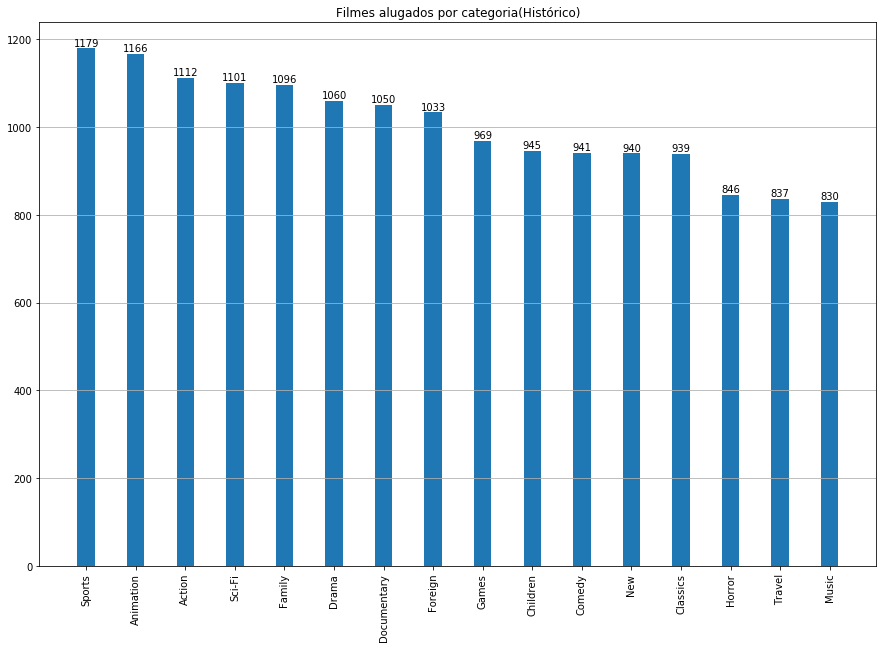

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('extracted-data/rented-by-category-historical.csv')
width = 0.35
x = np.arange(len(data['name']))
fig1, ax = plt.subplots(figsize = (15, 10))
bar1=ax.bar(x,data['count'], width)
ax.set_title('Filmes alugados por categoria(Histórico)')
ax.set_xticks(x)
ax.set_xticklabels((data['name']), rotation='vertical')
plt.grid(True,axis='y')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+1, '%d' % int(height), ha='center', va='bottom')
plt.show()

## Filmes alugados por categoria (30 dias)

Para filtrar os dados por data, basta adicionar o seguinte código na query anterior:
```
where rental_date between (
	(select max(rental_date) from rental) - interval '30 days')
	and (select max(rental_date) from rental)
```


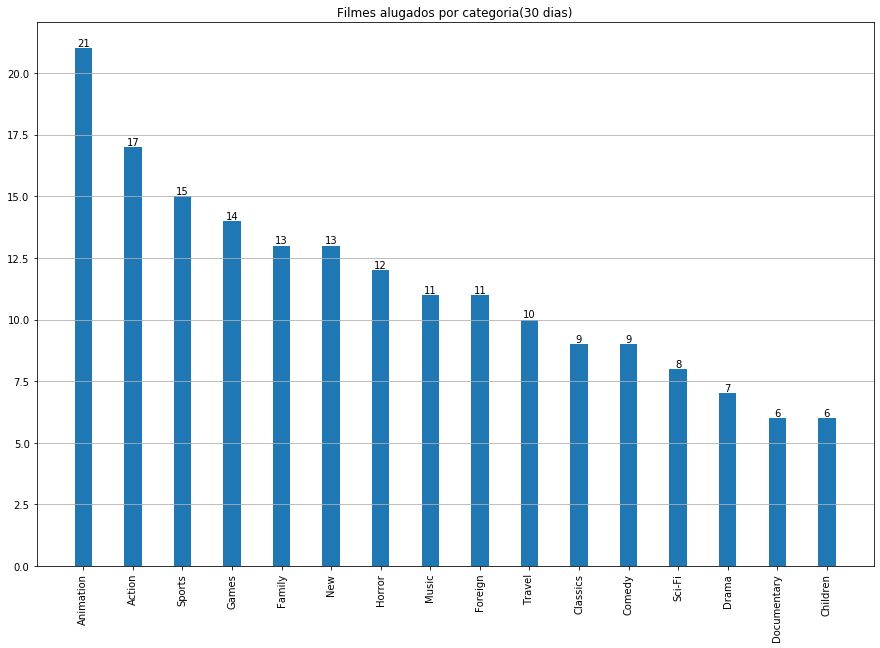

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('extracted-data/rented-by-category-30days.csv')
width = 0.35
x = np.arange(len(data['name']))
fig1, ax = plt.subplots(figsize = (15, 10))
bar1=ax.bar(x,data['count'], width)
ax.set_title('Filmes alugados por categoria(30 dias)')
ax.set_xticks(x)
ax.set_xticklabels((data['name']), rotation='vertical')
plt.grid(True,axis='y')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

## Filmes alugados por loja

A query abaixo seleciona e agrupa o número de filmes alugados por loja:
```
select store.store_id, count(store.store_id)
from rental
inner join staff on rental.staff_id = staff.staff_id
inner join store on staff.store_id = store.store_id 
group by store.store_id 
order by count(store.store_id ) desc
```
Vemos na tabela abaixo que ambas as lojas possuem uma performance similar.

In [52]:
import pandas as pd
data = pd.read_csv('extracted-data/rent-by-store.csv')

data

,store_id,count
0,1,8040
1,2,8004


## Top 10 Clientes (histórico)

A query abaixo extrai e agrupa os dez clientes que mais alugaram filmes:

```
select 
concat(customer.first_name,' ', customer.last_name) as full_name,
count(concat(customer.first_name,' ', customer.last_name)) 
from customer
inner join rental on (customer.customer_id = rental.customer_id)
group by concat(customer.first_name,' ', customer.last_name)
order by count(concat(customer.first_name,' ', customer.last_name)) desc
limit 10
```

In [53]:
import pandas as pd
data = pd.read_csv('extracted-data/top-customers-historical.csv')
data.columns = ['Nome do Cliente','Filmes alugados(histórico)']
data.head(10)

,Nome do Cliente,Filmes alugados(histórico)
0,Eleanor Hunt,46
1,Karl Seal,45
2,Clara Shaw,42
3,Marcia Dean,42
4,Tammy Sanders,41
5,Sue Peters,40
6,Wesley Bull,40
7,Rhonda Kennedy,39
8,Tim Cary,39
9,Marion Snyder,39


## Top 10 Clientes (30 dias)

Similar ao caso de Filmes por categoria, podemos filtrar os resultados por data:
```
where rental_date between (
	(select max(rental_date) from rental) - interval '30 days')
	and (select max(rental_date) from rental)
```    


In [54]:
import pandas as pd
data = pd.read_csv('extracted-data/top-customers-30days.csv')
data.columns = ['Nome do Cliente','Filmes alugados(30 dias)']
data.head(10)

,Nome do Cliente,Filmes alugados(30 dias)
0,Tammy Sanders,3
1,Sonia Gregory,2
2,Justin Ngo,2
3,Miguel Betancourt,2
4,Mildred Bailey,2
5,Carolyn Perez,2
6,Christine Roberts,2
7,Helen Harris,2
8,Annette Olson,2
9,Morris Mccarter,2


## Atores mais alugados

Podemos determinar que atores são mais alugados:

```
select concat(actor.first_name,' ', actor.last_name),
count(concat(actor.first_name,' ', actor.last_name))
from rental
inner join inventory on rental.inventory_id = inventory.inventory_id 
inner join film_actor on inventory.film_id = film_actor.film_id 
inner join actor on film_actor.actor_id = actor.actor_id 
group by concat(actor.first_name,' ', actor.last_name)
order by count(concat(actor.first_name,' ', actor.last_name)) desc
```

In [55]:
import pandas as pd
data = pd.read_csv('extracted-data/top-rented-actors.csv')
data.columns = ['Nome do ator','Filmes alugados']

data.head(10)

,Nome do ator,Filmes alugados
0,Susan Davis,825
1,Gina Degeneres,753
2,Matthew Carrey,678
3,Mary Keitel,674
4,Angela Witherspoon,654
5,Walter Torn,640
6,Henry Berry,612
7,Jayne Nolte,611
8,Val Bolger,605
9,Sandra Kilmer,604


## Atores com mais filmes em catálogo

Um ator mais alugado não necessariamente significa que ele é mais famoso entre os clientes, talvez ele apenas tenha mais filmes em catálogo. Para obter tal informação, utiliza-se a query:

```
select concat(actor.first_name,' ', actor.last_name),
count(concat(actor.first_name,' ', actor.last_name))
from film_actor
inner join actor on film_actor.actor_id = actor.actor_id 
group by concat(actor.first_name,' ', actor.last_name)
order by count(concat(actor.first_name,' ', actor.last_name)) desc
```

In [56]:
import pandas as pd
data = pd.read_csv('extracted-data/actor-per-movies.csv')
data.columns = ['Nome do ator','Número de Filmes']

data.head(10)

,Nome do ator,Número de Filmes
0,Susan Davis,54
1,Gina Degeneres,42
2,Walter Torn,41
3,Mary Keitel,40
4,Matthew Carrey,39
5,Sandra Kilmer,37
6,Scarlett Damon,36
7,Angela Witherspoon,35
8,Uma Wood,35
9,Vivien Basinger,35


Vemos que os atoresmais alugados nem sempre correspodem aos atores com mais filmes.

## Atores mais alugados (normalizado)

Podemos determinar quais atores mais alugados relativo ao número de filmes em catálogo com o código abaixo:

In [57]:
import pandas as pd

actor_per_movie = pd.read_csv('extracted-data/actor-per-movies.csv')
rented_actor = pd.read_csv('extracted-data/top-rented-actors.csv')
rented_actor_relative = pd.DataFrame(columns=['Actor','normalized_rent'])

for actor in rented_actor['concat']:
    ra=rented_actor['count'][rented_actor['concat']==actor].values[0]
    apm = actor_per_movie['count'][actor_per_movie['concat']==actor].values[0]
    norm_rent = ra/apm
    rented_actor_relative=rented_actor_relative.append(
        pd.DataFrame({"Actor":[actor],"normalized_rent":[norm_rent]}))

rented_actor_relative = rented_actor_relative.sort_values(by='normalized_rent',ascending=False)
rented_actor_relative.columns = ['Nome do ator','Filmes alugados (normalizado)']  
rented_actor_relative.head(10)

,Nome do ator,Filmes alugados (normalizado)
0,Burt Temple,19.304348
0,Frances Day-Lewis,18.692308
0,Angela Witherspoon,18.685714
0,Christopher Berry,18.550000
0,Penelope Pinkett,18.440000
0,Michael Bolger,18.433333
0,Tom Miranda,18.370370
0,Morgan Hopkins,18.296296
0,Charlize Dench,18.291667
0,Sean Guiness,18.151515
